In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def intensity(s, T, alpha, beta, mu):
    """
    Calcule l'intensité du processus de Hawkes à l'instant s.
    """
    intensity_value = mu
    for tau in T:
        intensity_value += alpha * np.exp(-beta * (s - tau))
    return intensity_value


In [3]:
def sim_Hawkes(mu, alpha, beta, T):
    """
    Simule un processus de Hawkes.
    """
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]

    while s < T:
        lambda_bar = intensity(s, t, alpha, beta, mu)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity(s, t, alpha, beta, mu)
        if D * lambda_bar <= lambda_s:
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)

    if t[-1] <= T:
        return times, events_count
    else:
        return times[:-1], events_count[:-1]

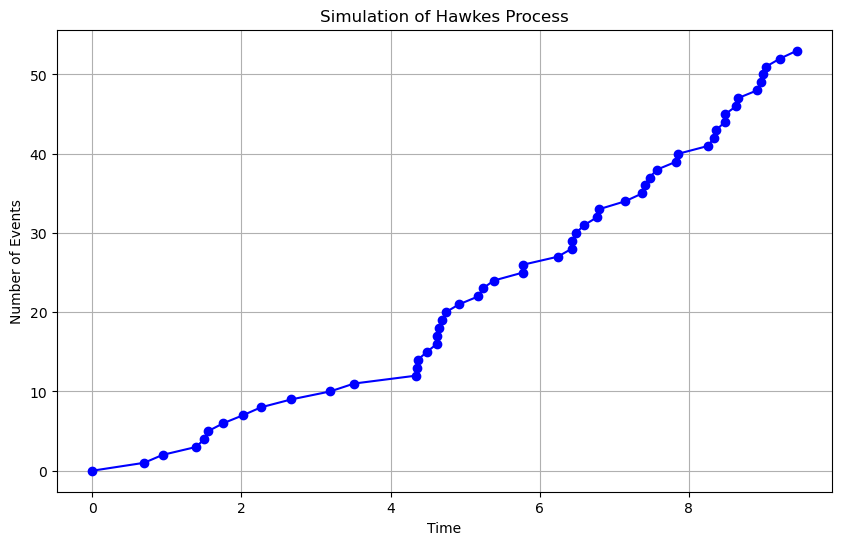

In [4]:
# Paramètres d'exemple
mu = 1.2
alpha = 0.6
beta = 0.8
T = 10

# Simulation du processus de Hawkes
times, events_count = sim_Hawkes(mu, alpha, beta, T)

# Tracé du nombre d'événements en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(times, events_count, color='blue', marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.title('Simulation of Hawkes Process')
plt.grid(True)
plt.show()